In [1]:
import pandas as pd

In [2]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
ds = pd.read_csv("Depressive_and_Non-Depressive_Tweets_Dataset.csv")
ds

,Unnamed: 0,text,sentiment
0,0,text,0
1,1,rising cases of covid does not alarm me rising...,1
2,2,please vote for chicagoindiaresolution marking...,0
3,3,wishing all of you eidaladha hazrat ibrahim as...,1
4,4,daily coronavirus cases in india top for first...,1
...,...,...,...
134343,134343,happydiwali to india from dgisi and dgispr you...,1
134344,134344,india has been involved in many countries with...,1
134345,134345,does anybody know website which ships pre orde...,0
134346,134346,what hinted few weeks back in an interview wit...,0


In [5]:
# drop first row 
ds = ds.iloc[1:]
ds

,Unnamed: 0,text,sentiment
1,1,rising cases of covid does not alarm me rising...,1
2,2,please vote for chicagoindiaresolution marking...,0
3,3,wishing all of you eidaladha hazrat ibrahim as...,1
4,4,daily coronavirus cases in india top for first...,1
5,5,sitting here india style watching the raindrop...,0
...,...,...,...
134343,134343,happydiwali to india from dgisi and dgispr you...,1
134344,134344,india has been involved in many countries with...,1
134345,134345,does anybody know website which ships pre orde...,0
134346,134346,what hinted few weeks back in an interview wit...,0


## DATA SOURCING

The dataset was got from Opendatabay. This dataset comprises depressive and non-depressive tweets collected between December 2019 and December 2020. Its primary purpose is to provide a valuable resource for sentiment analysis and text classification, particularly in the domain of mental health and wellness. the text data was obtained from social media posts (tweets), focusing on the mental health domain — specifically distinguishing between depressive and non-depressive language.

The dataset comprises of 3 columns, these are the ID, the text(the tweet), and the sentiment score(1 or 0).

Where the 1 = non-depressive and 0 = depressive

Metadata Included:

- Tweet text content

- Sentiment or classification label (Depressive / Non-Depressive)

- Keywords and hashtags relevant to mental health (e.g., “depression”, “sad”, “lonely”, “happy”)

**Purpose of the Data:**
To analyze sentiment patterns in tweets related to mental health, which can support understanding emotional trends, early detection of depressive tendencies, and improving mental health interventions.


In [6]:
#The Shape Of Data
print(f'The Shape Of Data Is : {ds.shape}')

The Shape Of Data Is : (134347, 3)


In [7]:
#Check for missing data
ds.isnull().sum()

Unnamed: 0     0
text          18
sentiment      0
dtype: int64

In [8]:
#Check for duplicates
ds.duplicated().sum()

np.int64(0)

In [9]:
# dropping null values
ds.dropna(inplace=True)
ds.isnull().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_30448\1070090436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.dropna(inplace=True)


Unnamed: 0    0
text          0
sentiment     0
dtype: int64

## Reseacrh Questions and Objectives

*Research Questions*

1. What are the most common keywords and linguistic patterns in depressive vs. non-depressive tweets?

2. What is the distribution of depressive and non-depressive posts in the dataset?

3. How accurately can an automated sentiment analysis model classify depressive tweets?

4. Can machine learning or NLP techniques help in identifying early signals of depressive language in social media posts?

*Objectives*

1. To preprocess and clean raw social media text data.

2. To explore patterns, keywords, and frequency of depressive vs. non-depressive language.

3. To apply sentiment analysis or text classification techniques to categorize tweets.

4. To evaluate model performance using metrics like accuracy, precision, and recall.

5. To provide insights that can support mental health awareness and intervention strategies.

## EDA

In [10]:
#Check for duplicates
ds.duplicated().sum()

np.int64(0)

The dataset has no duplicates

In [11]:
ds.dropna(inplace=True)
ds.isnull().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_30448\3000128140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.dropna(inplace=True)


Unnamed: 0    0
text          0
sentiment     0
dtype: int64

Drop any missing values that were within the dataset

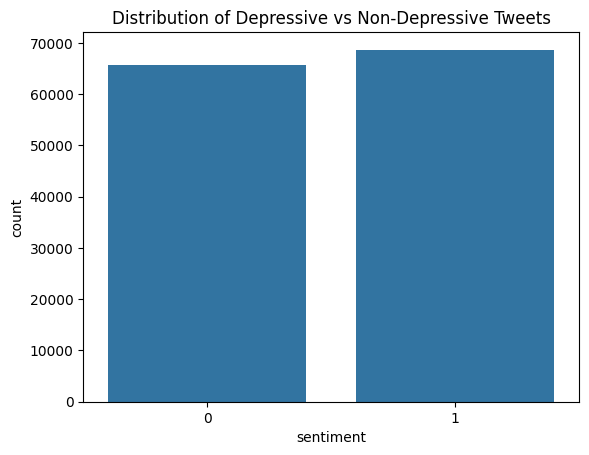

In [12]:
sns.countplot(x='sentiment', data=ds)
plt.title('Distribution of Depressive vs Non-Depressive Tweets')
plt.show()


This answers the research question about how depressive vs. non-depressive tweets are distributed.

The visualization shows the dataset has more non-depression tweets counts than depression tweets.

In [13]:
# Cleaning the text data

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r'\@w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove punctuation & numbers
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

ds['clean_text'] = ds['text'].apply(clean_text)


C:\Users\HP\AppData\Local\Temp\ipykernel_30448\3251793617.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['clean_text'] = ds['text'].apply(clean_text)


The text cleaning involved

- Lowercasing text

- Removing URLs, punctuation, mentions (@), hashtags, and special characters

- Removing stopwords

- Tokenizing words

In [14]:
#Word Frequency Analysis

from collections import Counter

non_depressive_words = ' '.join(ds[ds['sentiment']==1]['clean_text']).split()
depressive_words = ' '.join(ds[ds['sentiment']==0]['clean_text']).split()

print(Counter(depressive_words).most_common(20))
print(Counter(non_depressive_words).most_common(20))


[('india', 12164), ('like', 6918), ('sad', 6691), ('broken', 6594), ('people', 6443), ('anger', 5159), ('awful', 4836), ('health', 4502), ('get', 4427), ('one', 4356), ('blame', 3917), ('mental', 3910), ('alone', 3908), ('death', 3892), ('difficult', 3695), ('time', 3419), ('know', 3307), ('feel', 3235), ('want', 3030), ('disease', 2931)]
[('india', 10954), ('like', 6981), ('people', 6498), ('love', 5314), ('nice', 5252), ('one', 4825), ('good', 4679), ('get', 4497), ('time', 4114), ('day', 4092), ('lovely', 3919), ('new', 3764), ('really', 3656), ('health', 3594), ('know', 3430), ('much', 3226), ('want', 3144), ('would', 2988), ('happy', 2953), ('amazing', 2907)]


From this analysis we get the top 20 common drepression words and top 20 common non_dpression words

This out put can be used to create flags that can be used to identify possible cases of depression.

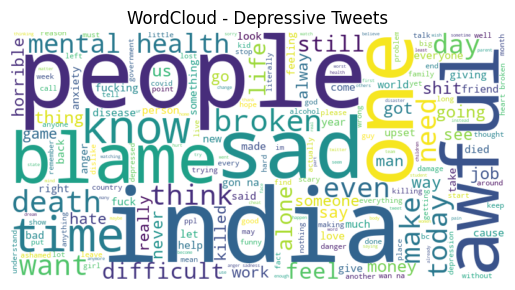

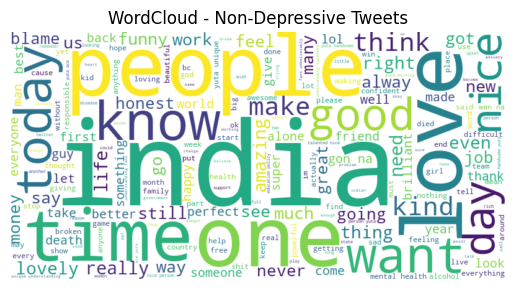

In [15]:
depressive_wc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(depressive_words))
plt.imshow(depressive_wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Depressive Tweets')
plt.show()

non_wc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(non_depressive_words))
plt.imshow(non_wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Non-Depressive Tweets')
plt.show()


This addresses the research question about common keywords and patterns in depressive vs. non-depressive tweets.

C:\Users\HP\AppData\Local\Temp\ipykernel_30448\3420116876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['text_length'] = ds['clean_text'].apply(lambda x: len(x.split()))


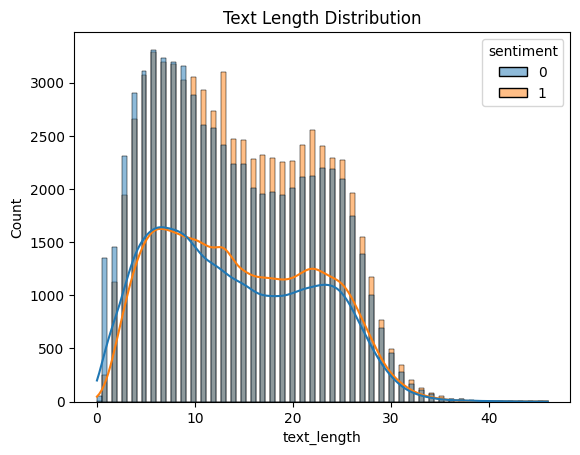

In [16]:
ds['text_length'] = ds['clean_text'].apply(lambda x: len(x.split()))
sns.histplot(data=ds, x='text_length', hue='sentiment', kde=True)
plt.title('Text Length Distribution')
plt.show()


This helps analyze whether depressive tweets are typically longer or shorter than non-depressive ones.

From the visualization we can obsever that the depressive tweets tend to be longer and have a higher word count


In [ ]:
#Mapping the sentiments to positive and negative

sentiment_mapping = {0: "Positive", 1: "Negative"}
ds['sentiment_label'] = ds['sentiment'].map(sentiment_mapping)

print("\nSample of mapped sentiments:")
print(ds[['sentiment', 'sentiment_label', 'clean_text']].head())


Sample of mapped sentiments:
   sentiment sentiment_label  \
1          1        Negative   
2          0        Positive   
3          1        Negative   
4          1        Negative   
5          0        Positive   

                                          clean_text  
1  rising cases covid alarm rising death rate tes...  
2  please vote chicagoindiaresolution marking ind...  
3  wishing eidaladha hazrat ibrahim ki sunnah aap...  
4  daily coronavirus cases india top first time c...  
5  sitting india style watching raindrops hit big...  


C:\Users\HP\AppData\Local\Temp\ipykernel_30448\2771161011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['sentiment_label'] = ds['sentiment'].map(sentiment_mapping)


In [20]:
ds_clean = ds.drop(['Unnamed: 0', 'text'], axis=1)
ds_clean

,sentiment,clean_text,text_length,sentiment_label
1,1,rising cases covid alarm rising death rate tes...,23,Negative
2,0,please vote chicagoindiaresolution marking ind...,12,Positive
3,1,wishing eidaladha hazrat ibrahim ki sunnah aap...,12,Negative
4,1,daily coronavirus cases india top first time c...,8,Negative
5,0,sitting india style watching raindrops hit big...,16,Positive
...,...,...,...,...
134343,1,happydiwali india dgisi dgispr real face expos...,10,Negative
134344,1,india involved many countries terrorism cells ...,25,Negative
134345,0,anybody know website ships pre order bts seaso...,10,Positive
134346,0,hinted weeks back interview today presented ev...,13,Positive


In [21]:
# exporting the ds_clean file
ds_clean.to_csv('ds_clean.csv', index=False)

In [23]:
# importing the ds_clean file
df = pd.read_csv('ds_clean.csv')
df

,sentiment,clean_text,text_length,sentiment_label
0,1,rising cases covid alarm rising death rate tes...,23,Negative
1,0,please vote chicagoindiaresolution marking ind...,12,Positive
2,1,wishing eidaladha hazrat ibrahim ki sunnah aap...,12,Negative
3,1,daily coronavirus cases india top first time c...,8,Negative
4,0,sitting india style watching raindrops hit big...,16,Positive
...,...,...,...,...
134324,1,happydiwali india dgisi dgispr real face expos...,10,Negative
134325,1,india involved many countries terrorism cells ...,25,Negative
134326,0,anybody know website ships pre order bts seaso...,10,Positive
134327,0,hinted weeks back interview today presented ev...,13,Positive


## Sentiment classification

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [25]:
# Drop any missing text rows
df = df.dropna(subset=['clean_text'])

In [26]:
# ---- 3. Split Data ----
X = df['clean_text']
y = df['sentiment_label']  # already mapped to 'Positive'/'Negative'

In [27]:
# Getting the train data and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 107420
Testing samples: 26856


In [29]:
# ---- 4. Vectorization ----
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

TF-IDF was used for text representation — it converts words into numeric vectors capturing word importance.

In [30]:
# ---- 5. Model Training ----
# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


Logistic Regression is chosen as the baseline model because it is simple, interpretable, and effective for text classification.

In [32]:
y_pred = log_reg.predict(X_test_tfidf)

Here, you feed the test set (which the model hasn’t seen before) into the model, and it outputs its best guess for each tweet’s sentiment.

y_pred will be a list or array of predictions

## Model Evaluation


In [31]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Positive')
recall = recall_score(y_test, y_pred, pos_label='Positive')
f1 = f1_score(y_test, y_pred, pos_label='Positive')

# Print summary
print("\n===== Logistic Regression Evaluation =====")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


===== Logistic Regression Evaluation =====
Accuracy:  0.9064
Precision: 0.8833
Recall:    0.9314
F1 Score:  0.9067


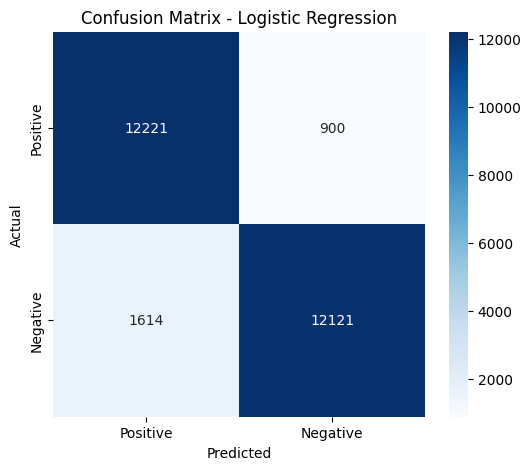

In [34]:
cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Negative'])
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positive','Negative'],
            yticklabels=['Positive','Negative'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_30448\3569855258.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='Blues_d')


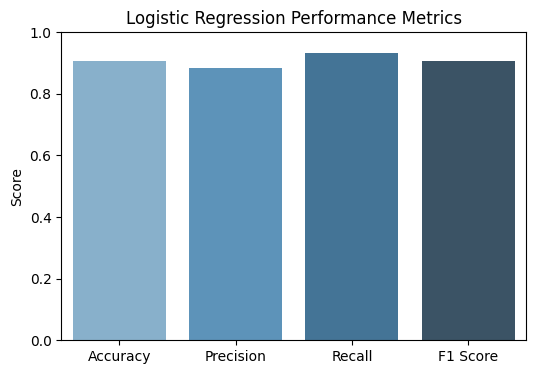

In [35]:
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
plt.figure(figsize=(6,4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='Blues_d')
plt.ylim(0,1)
plt.title('Logistic Regression Performance Metrics')
plt.ylabel('Score')
plt.show()

Compared these predictions (y_pred) with the true labels (y_test) to measure how well the model performed.

Acurracy -> Out of all tweets tested, ~91% were correctly classified as Positive or Negative.

Percision -> When the model predicted Positive, it was correct 88% of the time.

Recall -> Out of all the actual Positive tweets, the model successfully identified 93%.

F1 Score -> The harmonic mean of Precision and Recall — indicates strong overall balance between identifying and        predicting correctly.